In [2]:
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

In [4]:
# Image dimensions
img_width, img_height = 224, 224  # EfficientNetB0 input size
batch_size = 32
num_epochs = 20

In [5]:
# Load model for feature extraction
model = EfficientNetB0(weights='imagenet', include_top=False)

16705208/16705208 [==============================] - 0s 0us/step


In [6]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input according to the model requirements
    features = model.predict(img_data)
    return features

In [7]:

# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 104ms/step


In [8]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 97ms/step


In [9]:
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Ensure non-negative values
min_value = np.min(np.concatenate([x_train_scaled, x_test_scaled]))
x_train_scaled_non_negative = x_train_scaled - min_value
x_test_scaled_non_negative = x_test_scaled - min_value


In [10]:
# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
print("Training Decision Tree Classifier...")
clf.fit(x_train_scaled_non_negative, y_train)

# Predict on test set
y_pred = clf.predict(x_test_scaled_non_negative)


Training Decision Tree Classifier...


Performance metrics for Decision Tree Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        60
           1       0.36      0.40      0.38        60
           2       0.37      0.42      0.39        60
           3       0.59      0.58      0.59        60
           4       0.59      0.53      0.56        60

    accuracy                           0.46       300
   macro avg       0.47      0.46      0.47       300
weighted avg       0.47      0.46      0.47       300

Accuracy: 0.4633333333333333
Sensitivity: 0.4633333333333334
Precision: 0.47079532758614917
F1 Score: 0.4657861689018749



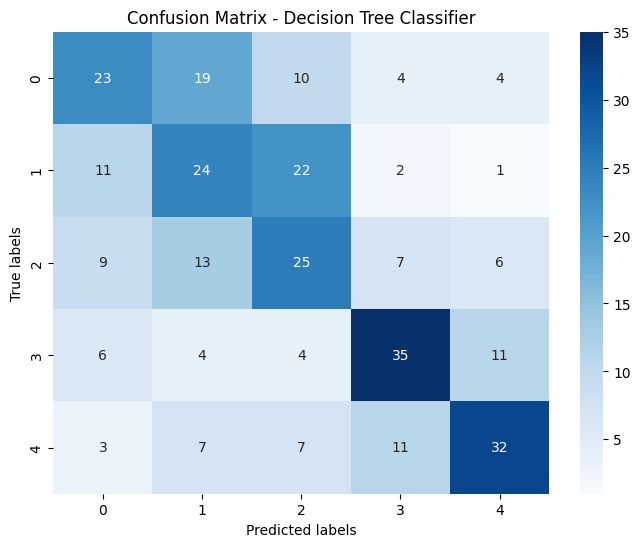

In [11]:
# Print performance metrics
print('Performance metrics for Decision Tree Classifier:')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Additional performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
precision = metrics.precision_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}\n')

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()